In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from torchinfo import summary
from torchviz import make_dot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['axes.grid'] = True
np.set_printoptions(suppress=True, precision=4)

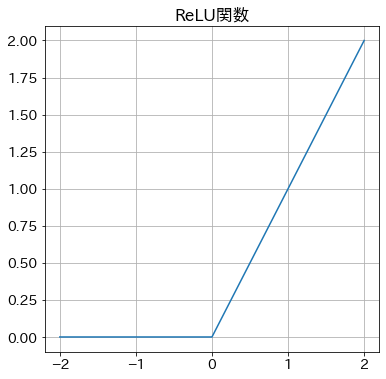

In [4]:
relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [6]:
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [7]:
x = x.to(device)
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [8]:
z = x * y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [9]:
y = y.to(device)

z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


In [11]:
data_root = '../../data'
train_set0 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True
)


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw




Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw




Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw




Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw

Processing...


/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1616554793803/work/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [13]:
!ls -lR ../../data/MNIST

../../data/MNIST:
total 0
drwxrwxrwx 1 docker docker 512 Nov  8 13:53 processed
drwxrwxrwx 1 docker docker 512 Nov  8 13:53 raw

../../data/MNIST/processed:
total 54144
-rwxrwxrwx 1 docker docker  7921089 Nov  8 13:53 test.pt
-rwxrwxrwx 1 docker docker 47521089 Nov  8 13:53 training.pt

../../data/MNIST/raw:
total 65008
-rwxrwxrwx 1 docker docker  7840016 Nov  8 13:53 t10k-images-idx3-ubyte
-rwxrwxrwx 1 docker docker  1648877 Nov  8 13:53 t10k-images-idx3-ubyte.gz
-rwxrwxrwx 1 docker docker    10008 Nov  8 13:53 t10k-labels-idx1-ubyte
-rwxrwxrwx 1 docker docker     4542 Nov  8 13:53 t10k-labels-idx1-ubyte.gz
-rwxrwxrwx 1 docker docker 47040016 Nov  8 13:53 train-images-idx3-ubyte
-rwxrwxrwx 1 docker docker  9912422 Nov  8 13:53 train-images-idx3-ubyte.gz
-rwxrwxrwx 1 docker docker    60008 Nov  8 13:53 train-labels-idx1-ubyte
-rwxrwxrwx 1 docker docker    28881 Nov  8 13:53 train-labels-idx1-ubyte.gz


In [14]:
print(f'データ件数: {len(train_set0)}')

データ件数: 60000


In [16]:
image, label = train_set0[0]
print(f'入力データの型: {type(image)}')
print(f'正解データの型: {type(label)}')

入力データの型: <class 'PIL.Image.Image'>
正解データの型: <class 'int'>


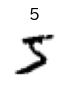

In [17]:
plt.figure(figsize=(1, 1))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

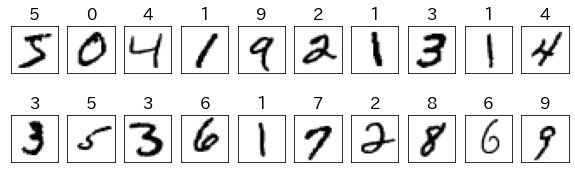

In [18]:
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i+1)
    image, label = train_set0[i]

    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
transform1 = transforms.Compose([
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform1
)

In [22]:
image, label = train_set1[0]
print(f'入力データの型: {type(image)}')
print(f'入力データのshape: {image.shape}')
print(f'最小値: {image.data.min()}')
print(f'最大値: {image.data.max()}')

入力データの型: <class 'torch.Tensor'>
入力データのshape: torch.Size([1, 28, 28])
最小値: 0.0
最大値: 1.0


In [23]:
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
])

train_set2 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform2
)

In [24]:
image, label = train_set2[0]
print(f'入力データの型: {type(image)}')
print(f'入力データのshape: {image.shape}')
print(f'最小値: {image.data.min()}')
print(f'最大値: {image.data.max()}')

入力データの型: <class 'torch.Tensor'>
入力データのshape: torch.Size([1, 28, 28])
最小値: -1.0
最大値: 1.0


In [25]:
transform3 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform3
)

In [26]:
image, label = train_set3[0]
print(f'入力データの型: {type(image)}')
print(f'入力データのshape: {image.shape}')
print(f'最小値: {image.data.min()}')
print(f'最大値: {image.data.max()}')

入力データの型: <class 'torch.Tensor'>
入力データのshape: torch.Size([784])
最小値: -1.0
最大値: 1.0


In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set = datasets.MNIST(
    root=data_root,
    train=True,
    download=True,
    transform=transform
)

test_set = datasets.MNIST(
    root=data_root,
    train=False,
    download=True,
    transform=transform
)

In [31]:
batch_size = 500

train_loader = DataLoader(
    train_set, 
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False
)

In [32]:
print(len(train_loader))

for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


In [33]:
n_input = image.shape[0]
n_output = len(set(list(labels.data.numpy())))
n_hidden = 128
print(f'n_input: {n_input}, n_hidden: {n_hidden}, n_output: {n_output}')

n_input: 784, n_hidden: 128, n_output: 10


In [34]:
class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden) -> None:
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [35]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net(n_input, n_output, n_hidden)
net = net.to(device)

In [36]:
lr = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

In [37]:
for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [38]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [39]:
for images, labels in train_loader:
    break

In [40]:
inputs = images.to(device)
labels = labels.to(device)

In [41]:
outputs = net(inputs)
print(outputs)

tensor([[-0.2347, -0.3425,  0.0899,  ...,  0.1381,  0.0646, -0.1324],
        [-0.3165, -0.0688,  0.1452,  ...,  0.1099,  0.1812, -0.1815],
        [-0.2774, -0.0132,  0.2615,  ...,  0.1648,  0.2842,  0.1294],
        ...,
        [-0.5029, -0.2869, -0.1153,  ...,  0.0900,  0.1472, -0.2540],
        [-0.2792, -0.1324,  0.1334,  ...,  0.1460,  0.2677,  0.1295],
        [-0.2898, -0.1230,  0.0781,  ...,  0.1608,  0.2435,  0.1557]],
       device='cuda:0', grad_fn=<AddmmBackward>)


2.334291458129883


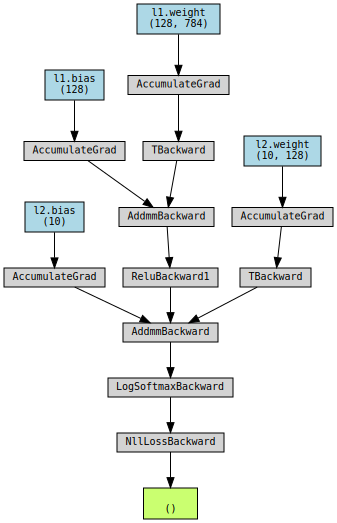

In [42]:
loss = criterion(outputs, labels)
print(loss.item())
make_dot(loss, params=dict(net.named_parameters()))

In [43]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net(n_input, n_output, n_hidden).to(device)

lr = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 100
history = np.zeros((0, 5))

In [45]:
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        predicted = torch.max(outputs, 1)[1]

        train_loss += loss.item()
        train_acc += (predicted == labels).sum()

    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum()

    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test

    print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))


Epoch [0/100], loss: 1.82906 acc: 0.57452 val_loss: 1.32709 val_acc: 0.73700



Epoch [1/100], loss: 1.03926 acc: 0.79543 val_loss: 0.79728 val_acc: 0.83640



Epoch [2/100], loss: 0.70831 acc: 0.84127 val_loss: 0.60302 val_acc: 0.85960



Epoch [3/100], loss: 0.57295 acc: 0.86123 val_loss: 0.51246 val_acc: 0.87120



Epoch [4/100], loss: 0.50216 acc: 0.87142 val_loss: 0.45812 val_acc: 0.87940



Epoch [5/100], loss: 0.45884 acc: 0.87862 val_loss: 0.42407 val_acc: 0.88680



Epoch [6/100], loss: 0.42953 acc: 0.88365 val_loss: 0.39993 val_acc: 0.89010



Epoch [7/100], loss: 0.40820 acc: 0.88772 val_loss: 0.38284 val_acc: 0.89330



Epoch [8/100], loss: 0.39181 acc: 0.89082 val_loss: 0.36841 val_acc: 0.89680



Epoch [9/100], loss: 0.37872 acc: 0.89333 val_loss: 0.35744 val_acc: 0.89900



Epoch [10/100], loss: 0.36810 acc: 0.89575 val_loss: 0.34819 val_acc: 0.90120



Epoch [11/100], loss: 0.35914 acc: 0.89815 val_loss: 0.34020 val_acc: 0.90330



Epoch [12/100], loss: 0.35137 acc: 0.90002 val_loss: 0.33519 val_acc: 0.90430



Epoch [13/100], loss: 0.34474 acc: 0.90145 val_loss: 0.32816 val_acc: 0.90770



Epoch [14/100], loss: 0.33869 acc: 0.90268 val_loss: 0.32274 val_acc: 0.90840



Epoch [15/100], loss: 0.33308 acc: 0.90427 val_loss: 0.31799 val_acc: 0.90810



Epoch [16/100], loss: 0.32836 acc: 0.90542 val_loss: 0.31324 val_acc: 0.90870



Epoch [17/100], loss: 0.32380 acc: 0.90653 val_loss: 0.30975 val_acc: 0.91080



Epoch [18/100], loss: 0.31961 acc: 0.90805 val_loss: 0.30643 val_acc: 0.91260



Epoch [19/100], loss: 0.31549 acc: 0.90930 val_loss: 0.30323 val_acc: 0.91340



Epoch [20/100], loss: 0.31194 acc: 0.90982 val_loss: 0.29928 val_acc: 0.91510



Epoch [21/100], loss: 0.30832 acc: 0.91128 val_loss: 0.29689 val_acc: 0.91610



Epoch [22/100], loss: 0.30495 acc: 0.91227 val_loss: 0.29412 val_acc: 0.91520



Epoch [23/100], loss: 0.30198 acc: 0.91327 val_loss: 0.29172 val_acc: 0.91610



Epoch [24/100], loss: 0.29869 acc: 0.91410 val_loss: 0.28940 val_acc: 0.91790



Epoch [25/100], loss: 0.29581 acc: 0.91527 val_loss: 0.28609 val_acc: 0.91840



Epoch [26/100], loss: 0.29293 acc: 0.91653 val_loss: 0.28441 val_acc: 0.91970



Epoch [27/100], loss: 0.29010 acc: 0.91697 val_loss: 0.28163 val_acc: 0.91870



Epoch [28/100], loss: 0.28746 acc: 0.91732 val_loss: 0.27873 val_acc: 0.92060



Epoch [29/100], loss: 0.28480 acc: 0.91843 val_loss: 0.27697 val_acc: 0.92110



Epoch [30/100], loss: 0.28211 acc: 0.91937 val_loss: 0.27481 val_acc: 0.92110



Epoch [31/100], loss: 0.27971 acc: 0.91947 val_loss: 0.27254 val_acc: 0.92220



Epoch [32/100], loss: 0.27725 acc: 0.92107 val_loss: 0.27096 val_acc: 0.92260



Epoch [33/100], loss: 0.27490 acc: 0.92138 val_loss: 0.26819 val_acc: 0.92430



Epoch [34/100], loss: 0.27260 acc: 0.92220 val_loss: 0.26619 val_acc: 0.92350



Epoch [35/100], loss: 0.27008 acc: 0.92297 val_loss: 0.26494 val_acc: 0.92420



Epoch [36/100], loss: 0.26797 acc: 0.92370 val_loss: 0.26234 val_acc: 0.92450



Epoch [37/100], loss: 0.26551 acc: 0.92423 val_loss: 0.26118 val_acc: 0.92610



Epoch [38/100], loss: 0.26355 acc: 0.92493 val_loss: 0.25865 val_acc: 0.92590



Epoch [39/100], loss: 0.26114 acc: 0.92525 val_loss: 0.25693 val_acc: 0.92690



Epoch [40/100], loss: 0.25891 acc: 0.92633 val_loss: 0.25644 val_acc: 0.92730



Epoch [41/100], loss: 0.25693 acc: 0.92653 val_loss: 0.25289 val_acc: 0.92770



Epoch [42/100], loss: 0.25467 acc: 0.92740 val_loss: 0.25115 val_acc: 0.92830



Epoch [43/100], loss: 0.25257 acc: 0.92830 val_loss: 0.25133 val_acc: 0.92900



Epoch [44/100], loss: 0.25050 acc: 0.92865 val_loss: 0.24776 val_acc: 0.92910



Epoch [45/100], loss: 0.24840 acc: 0.92935 val_loss: 0.24703 val_acc: 0.92900



Epoch [46/100], loss: 0.24636 acc: 0.92987 val_loss: 0.24341 val_acc: 0.93070



Epoch [47/100], loss: 0.24432 acc: 0.93082 val_loss: 0.24247 val_acc: 0.93140



Epoch [48/100], loss: 0.24236 acc: 0.93113 val_loss: 0.24059 val_acc: 0.93160



Epoch [49/100], loss: 0.24036 acc: 0.93150 val_loss: 0.23849 val_acc: 0.93210



Epoch [50/100], loss: 0.23829 acc: 0.93223 val_loss: 0.23675 val_acc: 0.93340



Epoch [51/100], loss: 0.23647 acc: 0.93272 val_loss: 0.23513 val_acc: 0.93340



Epoch [52/100], loss: 0.23451 acc: 0.93308 val_loss: 0.23324 val_acc: 0.93420



Epoch [53/100], loss: 0.23259 acc: 0.93422 val_loss: 0.23128 val_acc: 0.93450



Epoch [54/100], loss: 0.23072 acc: 0.93450 val_loss: 0.22961 val_acc: 0.93400



Epoch [55/100], loss: 0.22872 acc: 0.93537 val_loss: 0.22789 val_acc: 0.93560



Epoch [56/100], loss: 0.22698 acc: 0.93555 val_loss: 0.22646 val_acc: 0.93590



Epoch [57/100], loss: 0.22518 acc: 0.93645 val_loss: 0.22494 val_acc: 0.93660



Epoch [58/100], loss: 0.22327 acc: 0.93703 val_loss: 0.22299 val_acc: 0.93660



Epoch [59/100], loss: 0.22162 acc: 0.93725 val_loss: 0.22137 val_acc: 0.93690



Epoch [60/100], loss: 0.21973 acc: 0.93802 val_loss: 0.22064 val_acc: 0.93710



Epoch [61/100], loss: 0.21800 acc: 0.93852 val_loss: 0.21772 val_acc: 0.93750



Epoch [62/100], loss: 0.21629 acc: 0.93890 val_loss: 0.21713 val_acc: 0.93770



Epoch [63/100], loss: 0.21461 acc: 0.93985 val_loss: 0.21517 val_acc: 0.93820



Epoch [64/100], loss: 0.21291 acc: 0.94010 val_loss: 0.21318 val_acc: 0.93930



Epoch [65/100], loss: 0.21136 acc: 0.94040 val_loss: 0.21176 val_acc: 0.93990



Epoch [66/100], loss: 0.20959 acc: 0.94070 val_loss: 0.21070 val_acc: 0.93870



Epoch [67/100], loss: 0.20801 acc: 0.94125 val_loss: 0.20884 val_acc: 0.93940



Epoch [68/100], loss: 0.20644 acc: 0.94193 val_loss: 0.20718 val_acc: 0.93990



Epoch [69/100], loss: 0.20474 acc: 0.94228 val_loss: 0.20630 val_acc: 0.94070



Epoch [70/100], loss: 0.20321 acc: 0.94300 val_loss: 0.20517 val_acc: 0.93980



Epoch [71/100], loss: 0.20172 acc: 0.94320 val_loss: 0.20328 val_acc: 0.94020



Epoch [72/100], loss: 0.20019 acc: 0.94370 val_loss: 0.20180 val_acc: 0.94230



Epoch [73/100], loss: 0.19876 acc: 0.94425 val_loss: 0.20044 val_acc: 0.94270



Epoch [74/100], loss: 0.19722 acc: 0.94478 val_loss: 0.19939 val_acc: 0.94220



Epoch [75/100], loss: 0.19578 acc: 0.94483 val_loss: 0.19781 val_acc: 0.94320



Epoch [76/100], loss: 0.19424 acc: 0.94542 val_loss: 0.19624 val_acc: 0.94300



Epoch [77/100], loss: 0.19276 acc: 0.94550 val_loss: 0.19683 val_acc: 0.94260



Epoch [78/100], loss: 0.19151 acc: 0.94625 val_loss: 0.19370 val_acc: 0.94380



Epoch [79/100], loss: 0.19013 acc: 0.94650 val_loss: 0.19319 val_acc: 0.94300



Epoch [80/100], loss: 0.18874 acc: 0.94705 val_loss: 0.19105 val_acc: 0.94450



Epoch [81/100], loss: 0.18738 acc: 0.94715 val_loss: 0.19026 val_acc: 0.94540



Epoch [82/100], loss: 0.18598 acc: 0.94840 val_loss: 0.18918 val_acc: 0.94480



Epoch [83/100], loss: 0.18459 acc: 0.94808 val_loss: 0.18803 val_acc: 0.94480



Epoch [84/100], loss: 0.18340 acc: 0.94848 val_loss: 0.18651 val_acc: 0.94540



Epoch [85/100], loss: 0.18213 acc: 0.94880 val_loss: 0.18528 val_acc: 0.94660



Epoch [86/100], loss: 0.18085 acc: 0.94925 val_loss: 0.18407 val_acc: 0.94630



Epoch [87/100], loss: 0.17960 acc: 0.94973 val_loss: 0.18267 val_acc: 0.94650



Epoch [88/100], loss: 0.17840 acc: 0.95020 val_loss: 0.18174 val_acc: 0.94720



Epoch [89/100], loss: 0.17709 acc: 0.95053 val_loss: 0.18065 val_acc: 0.94730



Epoch [90/100], loss: 0.17594 acc: 0.95072 val_loss: 0.18018 val_acc: 0.94720



Epoch [91/100], loss: 0.17478 acc: 0.95118 val_loss: 0.17874 val_acc: 0.94770



Epoch [92/100], loss: 0.17354 acc: 0.95167 val_loss: 0.17739 val_acc: 0.94800



Epoch [93/100], loss: 0.17243 acc: 0.95200 val_loss: 0.17655 val_acc: 0.94800



Epoch [94/100], loss: 0.17130 acc: 0.95227 val_loss: 0.17545 val_acc: 0.94750



Epoch [95/100], loss: 0.17016 acc: 0.95232 val_loss: 0.17444 val_acc: 0.94810



Epoch [96/100], loss: 0.16906 acc: 0.95322 val_loss: 0.17346 val_acc: 0.94870



Epoch [97/100], loss: 0.16785 acc: 0.95343 val_loss: 0.17271 val_acc: 0.94850



Epoch [98/100], loss: 0.16701 acc: 0.95352 val_loss: 0.17238 val_acc: 0.94880



Epoch [99/100], loss: 0.16580 acc: 0.95347 val_loss: 0.17156 val_acc: 0.94860


In [46]:
print(f'初期状態: 損失: {history[0, 3]:.5f} 精度: {history[0, 4]:.5f}')
print(f'最終状態: 損失: {history[-1, 3]:.5f} 精度: {history[-1, 4]:.5f}')

初期状態: 損失: 1.32709 精度: 0.73700
最終状態: 損失: 0.17156 精度: 0.94860


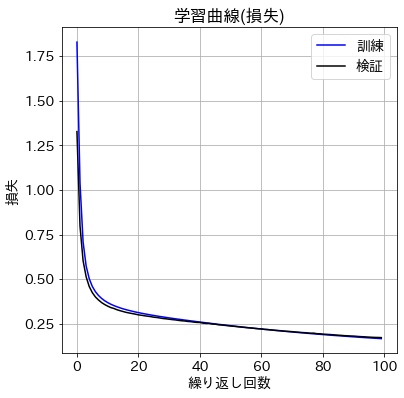

In [47]:
plt.plot(history[:, 0], history[:, 1], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

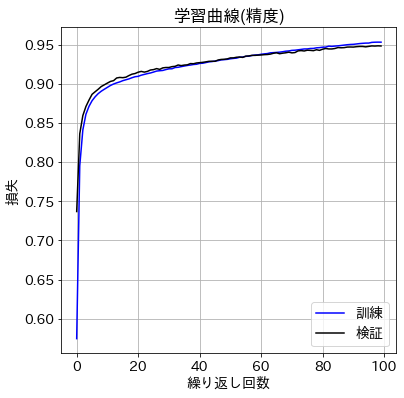

In [48]:
plt.plot(history[:, 0], history[:, 2], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

In [49]:
for images, labels in test_loader:
    break

inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

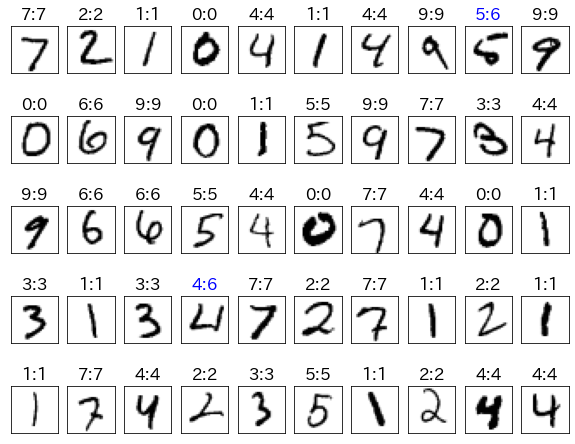

In [50]:
plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  image2 = (image + 1)/ 2
    
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [51]:
class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden) -> None:
        super().__init__()

        self.l1 = nn.Linear(n_input, n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [53]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

net = Net2(n_input, n_output, n_hidden).to(device)

lr = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 100
history = np.zeros((0, 5))

In [54]:
print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [55]:
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        predicted = torch.max(outputs, 1)[1]

        train_loss += loss.item()
        train_acc += (predicted == labels).sum()

    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        outputs_test = net(inputs_test)
        loss_test = criterion(outputs_test, labels_test)

        predicted_test = torch.max(outputs_test, 1)[1]

        val_loss += loss_test.item()
        val_acc += (predicted_test == labels_test).sum()

    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test

    print(f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f} val_acc: {val_acc:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))


Epoch [0/100], loss: 2.20237 acc: 0.25737 val_loss: 2.04650 val_acc: 0.47240



Epoch [1/100], loss: 1.75686 acc: 0.59707 val_loss: 1.38974 val_acc: 0.71280



Epoch [2/100], loss: 1.11007 acc: 0.75915 val_loss: 0.86247 val_acc: 0.80530



Epoch [3/100], loss: 0.74921 acc: 0.82362 val_loss: 0.63268 val_acc: 0.84380



Epoch [4/100], loss: 0.58864 acc: 0.85083 val_loss: 0.52329 val_acc: 0.86370



Epoch [5/100], loss: 0.50581 acc: 0.86613 val_loss: 0.46133 val_acc: 0.87750



Epoch [6/100], loss: 0.45582 acc: 0.87610 val_loss: 0.42253 val_acc: 0.88590



Epoch [7/100], loss: 0.42269 acc: 0.88195 val_loss: 0.39456 val_acc: 0.89030



Epoch [8/100], loss: 0.39919 acc: 0.88803 val_loss: 0.37452 val_acc: 0.89620



Epoch [9/100], loss: 0.38134 acc: 0.89200 val_loss: 0.35890 val_acc: 0.89840



Epoch [10/100], loss: 0.36749 acc: 0.89488 val_loss: 0.34772 val_acc: 0.90210



Epoch [11/100], loss: 0.35570 acc: 0.89747 val_loss: 0.33597 val_acc: 0.90450



Epoch [12/100], loss: 0.34593 acc: 0.90030 val_loss: 0.32889 val_acc: 0.90560



Epoch [13/100], loss: 0.33760 acc: 0.90285 val_loss: 0.31996 val_acc: 0.90920



Epoch [14/100], loss: 0.33000 acc: 0.90408 val_loss: 0.31450 val_acc: 0.90840



Epoch [15/100], loss: 0.32329 acc: 0.90568 val_loss: 0.30754 val_acc: 0.91090



Epoch [16/100], loss: 0.31687 acc: 0.90785 val_loss: 0.30271 val_acc: 0.91290



Epoch [17/100], loss: 0.31155 acc: 0.90952 val_loss: 0.29821 val_acc: 0.91220



Epoch [18/100], loss: 0.30641 acc: 0.91072 val_loss: 0.29300 val_acc: 0.91440



Epoch [19/100], loss: 0.30139 acc: 0.91217 val_loss: 0.28991 val_acc: 0.91660



Epoch [20/100], loss: 0.29689 acc: 0.91392 val_loss: 0.28492 val_acc: 0.91760



Epoch [21/100], loss: 0.29274 acc: 0.91497 val_loss: 0.28155 val_acc: 0.91880



Epoch [22/100], loss: 0.28866 acc: 0.91580 val_loss: 0.27854 val_acc: 0.92050



Epoch [23/100], loss: 0.28490 acc: 0.91710 val_loss: 0.27586 val_acc: 0.92060



Epoch [24/100], loss: 0.28102 acc: 0.91830 val_loss: 0.27386 val_acc: 0.92210



Epoch [25/100], loss: 0.27748 acc: 0.91943 val_loss: 0.26979 val_acc: 0.92240



Epoch [26/100], loss: 0.27407 acc: 0.92043 val_loss: 0.26594 val_acc: 0.92270



Epoch [27/100], loss: 0.27061 acc: 0.92100 val_loss: 0.26327 val_acc: 0.92420



Epoch [28/100], loss: 0.26751 acc: 0.92198 val_loss: 0.25993 val_acc: 0.92530



Epoch [29/100], loss: 0.26397 acc: 0.92303 val_loss: 0.25778 val_acc: 0.92440



Epoch [30/100], loss: 0.26118 acc: 0.92388 val_loss: 0.25460 val_acc: 0.92650



Epoch [31/100], loss: 0.25817 acc: 0.92512 val_loss: 0.25260 val_acc: 0.92660



Epoch [32/100], loss: 0.25507 acc: 0.92590 val_loss: 0.24955 val_acc: 0.92800



Epoch [33/100], loss: 0.25228 acc: 0.92692 val_loss: 0.24665 val_acc: 0.92920



Epoch [34/100], loss: 0.24944 acc: 0.92735 val_loss: 0.24506 val_acc: 0.92710



Epoch [35/100], loss: 0.24660 acc: 0.92845 val_loss: 0.24316 val_acc: 0.92960



Epoch [36/100], loss: 0.24378 acc: 0.92925 val_loss: 0.23959 val_acc: 0.93020



Epoch [37/100], loss: 0.24123 acc: 0.93053 val_loss: 0.23820 val_acc: 0.93100



Epoch [38/100], loss: 0.23846 acc: 0.93158 val_loss: 0.23563 val_acc: 0.93130



Epoch [39/100], loss: 0.23579 acc: 0.93187 val_loss: 0.23231 val_acc: 0.93330



Epoch [40/100], loss: 0.23321 acc: 0.93258 val_loss: 0.23116 val_acc: 0.93240



Epoch [41/100], loss: 0.23061 acc: 0.93330 val_loss: 0.22779 val_acc: 0.93430



Epoch [42/100], loss: 0.22812 acc: 0.93425 val_loss: 0.22582 val_acc: 0.93250



Epoch [43/100], loss: 0.22566 acc: 0.93478 val_loss: 0.22391 val_acc: 0.93500



Epoch [44/100], loss: 0.22307 acc: 0.93560 val_loss: 0.22071 val_acc: 0.93550



Epoch [45/100], loss: 0.22040 acc: 0.93595 val_loss: 0.21869 val_acc: 0.93640



Epoch [46/100], loss: 0.21825 acc: 0.93705 val_loss: 0.21622 val_acc: 0.93580



Epoch [47/100], loss: 0.21568 acc: 0.93728 val_loss: 0.21562 val_acc: 0.93840



Epoch [48/100], loss: 0.21343 acc: 0.93840 val_loss: 0.21198 val_acc: 0.93750



Epoch [49/100], loss: 0.21089 acc: 0.93965 val_loss: 0.21002 val_acc: 0.93910



Epoch [50/100], loss: 0.20869 acc: 0.93985 val_loss: 0.20779 val_acc: 0.93880



Epoch [51/100], loss: 0.20636 acc: 0.94028 val_loss: 0.20686 val_acc: 0.94050



Epoch [52/100], loss: 0.20413 acc: 0.94120 val_loss: 0.20370 val_acc: 0.93910



Epoch [53/100], loss: 0.20185 acc: 0.94200 val_loss: 0.20165 val_acc: 0.94170



Epoch [54/100], loss: 0.19985 acc: 0.94250 val_loss: 0.20036 val_acc: 0.94160



Epoch [55/100], loss: 0.19784 acc: 0.94307 val_loss: 0.19800 val_acc: 0.94250



Epoch [56/100], loss: 0.19563 acc: 0.94348 val_loss: 0.19677 val_acc: 0.94300



Epoch [57/100], loss: 0.19369 acc: 0.94398 val_loss: 0.19415 val_acc: 0.94120



Epoch [58/100], loss: 0.19159 acc: 0.94477 val_loss: 0.19188 val_acc: 0.94370



Epoch [59/100], loss: 0.18955 acc: 0.94515 val_loss: 0.19038 val_acc: 0.94260



Epoch [60/100], loss: 0.18745 acc: 0.94630 val_loss: 0.18777 val_acc: 0.94390



Epoch [61/100], loss: 0.18535 acc: 0.94657 val_loss: 0.18831 val_acc: 0.94530



Epoch [62/100], loss: 0.18373 acc: 0.94707 val_loss: 0.18548 val_acc: 0.94500



Epoch [63/100], loss: 0.18172 acc: 0.94825 val_loss: 0.18298 val_acc: 0.94530



Epoch [64/100], loss: 0.17985 acc: 0.94830 val_loss: 0.18139 val_acc: 0.94530



Epoch [65/100], loss: 0.17815 acc: 0.94853 val_loss: 0.18023 val_acc: 0.94720



Epoch [66/100], loss: 0.17624 acc: 0.94898 val_loss: 0.17906 val_acc: 0.94830



Epoch [67/100], loss: 0.17469 acc: 0.94965 val_loss: 0.17664 val_acc: 0.94820



Epoch [68/100], loss: 0.17275 acc: 0.95060 val_loss: 0.17520 val_acc: 0.94840



Epoch [69/100], loss: 0.17113 acc: 0.95100 val_loss: 0.17319 val_acc: 0.94870



Epoch [70/100], loss: 0.16943 acc: 0.95148 val_loss: 0.17235 val_acc: 0.94910



Epoch [71/100], loss: 0.16781 acc: 0.95170 val_loss: 0.17100 val_acc: 0.94970



Epoch [72/100], loss: 0.16612 acc: 0.95250 val_loss: 0.16835 val_acc: 0.95010



Epoch [73/100], loss: 0.16452 acc: 0.95288 val_loss: 0.16835 val_acc: 0.94990



Epoch [74/100], loss: 0.16296 acc: 0.95298 val_loss: 0.16695 val_acc: 0.95000



Epoch [75/100], loss: 0.16132 acc: 0.95373 val_loss: 0.16544 val_acc: 0.95110



Epoch [76/100], loss: 0.15962 acc: 0.95443 val_loss: 0.16335 val_acc: 0.95220



Epoch [77/100], loss: 0.15837 acc: 0.95470 val_loss: 0.16233 val_acc: 0.95120



Epoch [78/100], loss: 0.15666 acc: 0.95520 val_loss: 0.16138 val_acc: 0.95260



Epoch [79/100], loss: 0.15547 acc: 0.95532 val_loss: 0.15949 val_acc: 0.95310



Epoch [80/100], loss: 0.15385 acc: 0.95598 val_loss: 0.15934 val_acc: 0.95200



Epoch [81/100], loss: 0.15253 acc: 0.95653 val_loss: 0.15722 val_acc: 0.95280



Epoch [82/100], loss: 0.15103 acc: 0.95673 val_loss: 0.15673 val_acc: 0.95320



Epoch [83/100], loss: 0.14976 acc: 0.95690 val_loss: 0.15514 val_acc: 0.95310



Epoch [84/100], loss: 0.14815 acc: 0.95753 val_loss: 0.15370 val_acc: 0.95370



Epoch [85/100], loss: 0.14678 acc: 0.95797 val_loss: 0.15202 val_acc: 0.95480



Epoch [86/100], loss: 0.14559 acc: 0.95865 val_loss: 0.15089 val_acc: 0.95500



Epoch [87/100], loss: 0.14436 acc: 0.95877 val_loss: 0.15020 val_acc: 0.95530



Epoch [88/100], loss: 0.14313 acc: 0.95910 val_loss: 0.14935 val_acc: 0.95440



Epoch [89/100], loss: 0.14195 acc: 0.95948 val_loss: 0.14764 val_acc: 0.95610



Epoch [90/100], loss: 0.14073 acc: 0.95993 val_loss: 0.14636 val_acc: 0.95620



Epoch [91/100], loss: 0.13930 acc: 0.96038 val_loss: 0.14624 val_acc: 0.95630



Epoch [92/100], loss: 0.13806 acc: 0.96075 val_loss: 0.14425 val_acc: 0.95680



Epoch [93/100], loss: 0.13686 acc: 0.96115 val_loss: 0.14407 val_acc: 0.95720



Epoch [94/100], loss: 0.13576 acc: 0.96093 val_loss: 0.14326 val_acc: 0.95660



Epoch [95/100], loss: 0.13463 acc: 0.96180 val_loss: 0.14228 val_acc: 0.95700



Epoch [96/100], loss: 0.13346 acc: 0.96178 val_loss: 0.14063 val_acc: 0.95730



Epoch [97/100], loss: 0.13227 acc: 0.96265 val_loss: 0.13944 val_acc: 0.95760



Epoch [98/100], loss: 0.13103 acc: 0.96262 val_loss: 0.13936 val_acc: 0.95780



Epoch [99/100], loss: 0.12999 acc: 0.96367 val_loss: 0.13887 val_acc: 0.95860


In [56]:
print(f'初期状態: 損失: {history[0, 3]:.5f} 精度: {history[0, 4]:.5f}')
print(f'最終状態: 損失: {history[-1, 3]:.5f} 精度: {history[-1, 4]:.5f}')

初期状態: 損失: 2.04650 精度: 0.47240
最終状態: 損失: 0.13887 精度: 0.95860


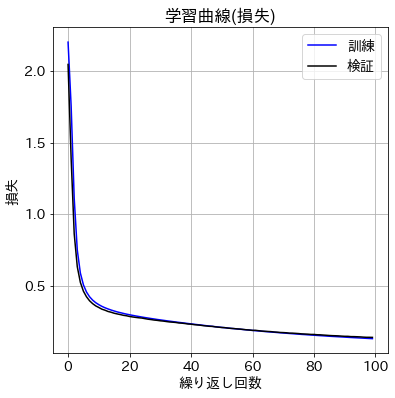

In [57]:
plt.plot(history[:, 0], history[:, 1], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

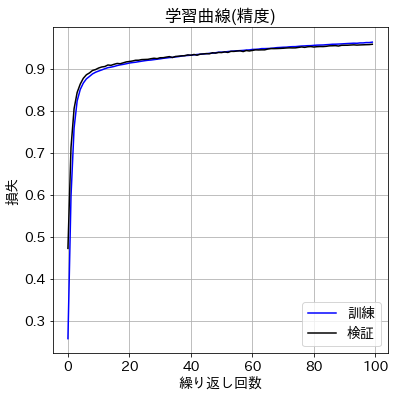

In [58]:
plt.plot(history[:, 0], history[:, 2], 'b', label='訓練')
plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()